In [1]:
import scipy 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.ndimage import gaussian_filter1d
import time
%matplotlib inline

## A simple example -- Birth and Death process using discrete time stepping
This example simulates birth and death process drawing from a exponential distribution 

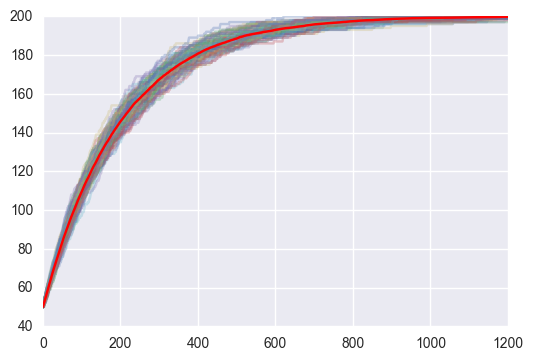

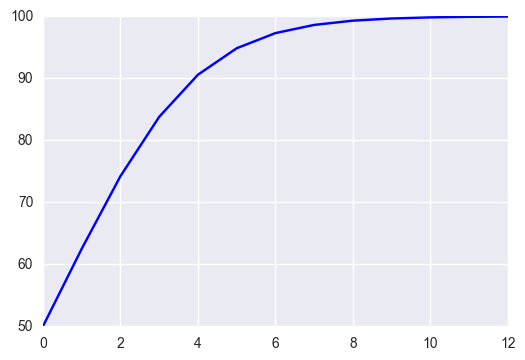

In [80]:
P = 100000  # maximum population size, this parameter is not used. (or set to infinity)
a = .5  # birth rate
b = .005  # death rate

N = 100 # number of realisation
T = 1200 # number of time steps
x = np.zeros((N, T))
init_val = 50
for i in range(N): # number of realisation
    x[i][0] = init_val
    for t in range(T - 1): # time steps
        if 0 < x[i][t]:
            # Is there a birth?
            birth = np.random.rand() <= a*x[i][t]
            # Is there a death?
            death = np.random.rand() <= b*x[i][t]
            # We update the population size.
            x[i][t+1] = x[i][t] + 1*birth - 1*death
        # The evolution stops if we reach $0$ or $N$.
        else:
            x[i][t+1] = x[i][t]

    #print x[:20]


plt.plot(x.transpose(), alpha=0.3)
plt.plot(x.mean(axis=0), color='r')
plt.figure()
y = np.zeros(T)
y[0] = init_val
for t in range(T-1):
    y[t+1] = y[t] * (1 + a - b * y[t])
plt.plot(y[:int(-1.0 / a * np.log(0.001))], color='b')

## A simple example -- Birth - death in as continuous time markov process

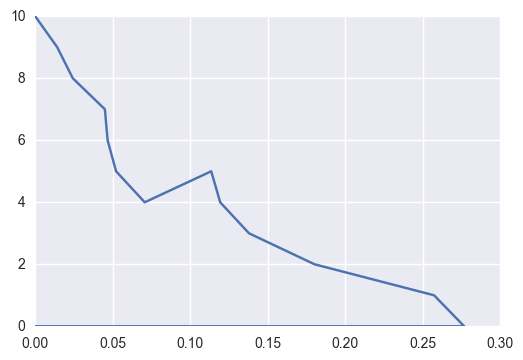

In [147]:
# Parameters
tau = 0.001 # time interval
gamma = 0.01 # birth rate
kappa = 0.009 # death rate 

t_inf = 1000 # "time at infinity" 
n_max = int(t_inf / tau) # number simulated time generation
num_sim = 1 # number realisations
N_init = 10

record = np.zeros((num_sim, n_max))
time = np.zeros((num_sim, n_max))
record[:, 0] = np.ones(num_sim) * N_init

for i in range(num_sim):
    for t in range(n_max -1):
        if record[i][t] > 0:
            dn = kappa * record[i][t]
            bn = gamma * record[i][t]
            death_time = random_exp_time(dn / tau, 1)
            birth_time = random_exp_time(tau / tau, 1)
            if death_time < birth_time: #death occur
                record[i][t + 1] = record[i][t] -1
                time[i][t + 1] = time[i][t] + death_time
            else:
                record[i][t + 1] = record[i][t] +1
                time[i][t + 1] = time[i][t] + birth_time
        else:
            continue

for i in range(num_sim):
    plt.plot(time[i], record[i])
#plt.plot(record.transpose(), alpha=0.3)
#plt.plot(record.mean(axis=0), color='r')

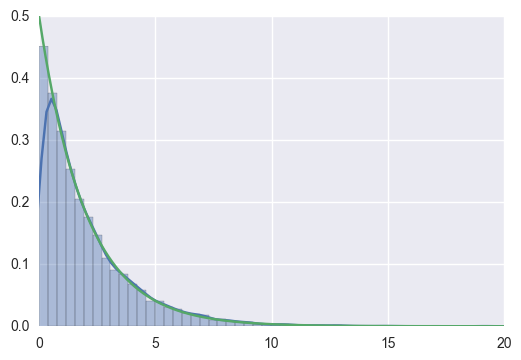

In [119]:
r = 0.5
N = 10000
ax = plt.subplot(111)
ax.set_xlim(0, 10.0/r)
sns.distplot(random_exp_time(r, N), ax=ax)
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, num=1000)
ax.plot(x, r * np.exp(-r * x))

In [109]:
def random_exp_time(rate=1, *n):
    """
    Return a random vector with n entries, 
    each beingn a waiting time which is exponentially
    distributed.
    """
    return -1.0/rate * np.log(np.random.rand(*n))